In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 커널 함수 정의
def k1(t,k=1):
    return k - t

def k2(t):
    """kappa_2(t) = exp(-t^2)"""
    return np.exp(-t**2)

def k3(t):
    """kappa_3(t) = t"""
    return t

def k4(t):
    """kappa_4(t) = exp(t) / (1 + exp(t)) (Sigmoid)"""
    return np.exp(t) / (1 + np.exp(t))

def plot_convexity_check(h=1.0):
    """
    Objective function f(p) = ||D_X^k T(p) - T(p) D_Y^k||_HS^2 를 플로팅합니다.
    T(p)는 2x2 doubly stochastic 행렬의 1D 파라미터화입니다.
    """
    
    # 2. 파라미터 p 설정 (p가 0에서 1까지 변함)
    p = np.linspace(0, 1, 101)
    
    # 3. T(p) 행렬 생성 (101, 2, 2)
    # T(p) = [[p, 1-p], [1-p, p]]
    T_p = np.zeros((len(p), 2, 2))
    T_p[:, 0, 0] = p
    T_p[:, 0, 1] = 1 - p
    T_p[:, 1, 0] = 1 - p
    T_p[:, 1, 1] = p
    
    # 4. D_X, D_Y 거리 행렬 설정 (간단한 예시)
    # 2x2 케이스, d(x1, x2) = 1, d(y1, y2) = 2
    D_X_dist = np.array([[0., 1.], [1., 0.]])
    D_Y_dist = np.array([[0., 2.], [2., 0.]]) # D_X와 D_Y는 달라야 의미가 있음
    
    kernels = [k1, k2, k3, k4]
    titles = [
        r'$\kappa(t) = 1-t$',
        r'$\kappa(t) = \exp(-t^2)$',
        r'$\kappa(t) = t$',
        r'$\kappa(t) = \exp(t)/(1+\exp(t))$'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    objective_results = {}

    for ax, kernel, title in zip(axes, kernels, titles):
        # 5. 커널 행렬 D_X^k, D_Y^k 계산
        # h 파라미터 적용
        DX_k = kernel(D_X_dist / h)/h
        DY_k = kernel(D_Y_dist / h)/h
        
        # 6. Objective function 계산
        # f(p) = ||D_X^k T(p) - T(p) D_Y^k||_HS^2
        
        # term1 = D_X^k @ T(p)
        # (2, 2) @ (101, 2, 2) -> (101, 2, 2) using einsum
        term1 = np.einsum('ij,kjl->kil', DX_k, T_p)
        
        # term2 = T(p) @ D_Y^k
        # (101, 2, 2) @ (2, 2) -> (101, 2, 2) using einsum
        term2 = np.einsum('kij,jl->kil', T_p, DY_k)
        
        # 차이 행렬 (101, 2, 2)
        diff = term1 - term2
        
        # Frobenius norm의 제곱 계산: ||A||_HS^2 = sum(A_ij^2)
        # (101, 2, 2) -> (101,)
        objective_values = np.sum(diff**2, axis=(1, 2))
        
        objective_results[title] = objective_values
        
        # 7. 플로팅
        ax.plot(p, objective_values, lw=2)
        ax.set_title(f'Kernel: {title} (h={h})', fontsize=14)
        ax.set_xlabel('p (Parameter for T)', fontsize=12)
        ax.set_ylabel(r'$||D_X^\kappa T_p - T_p D_Y^\kappa||_{HS}^2$', fontsize=12)
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()
    
    return p, objective_results

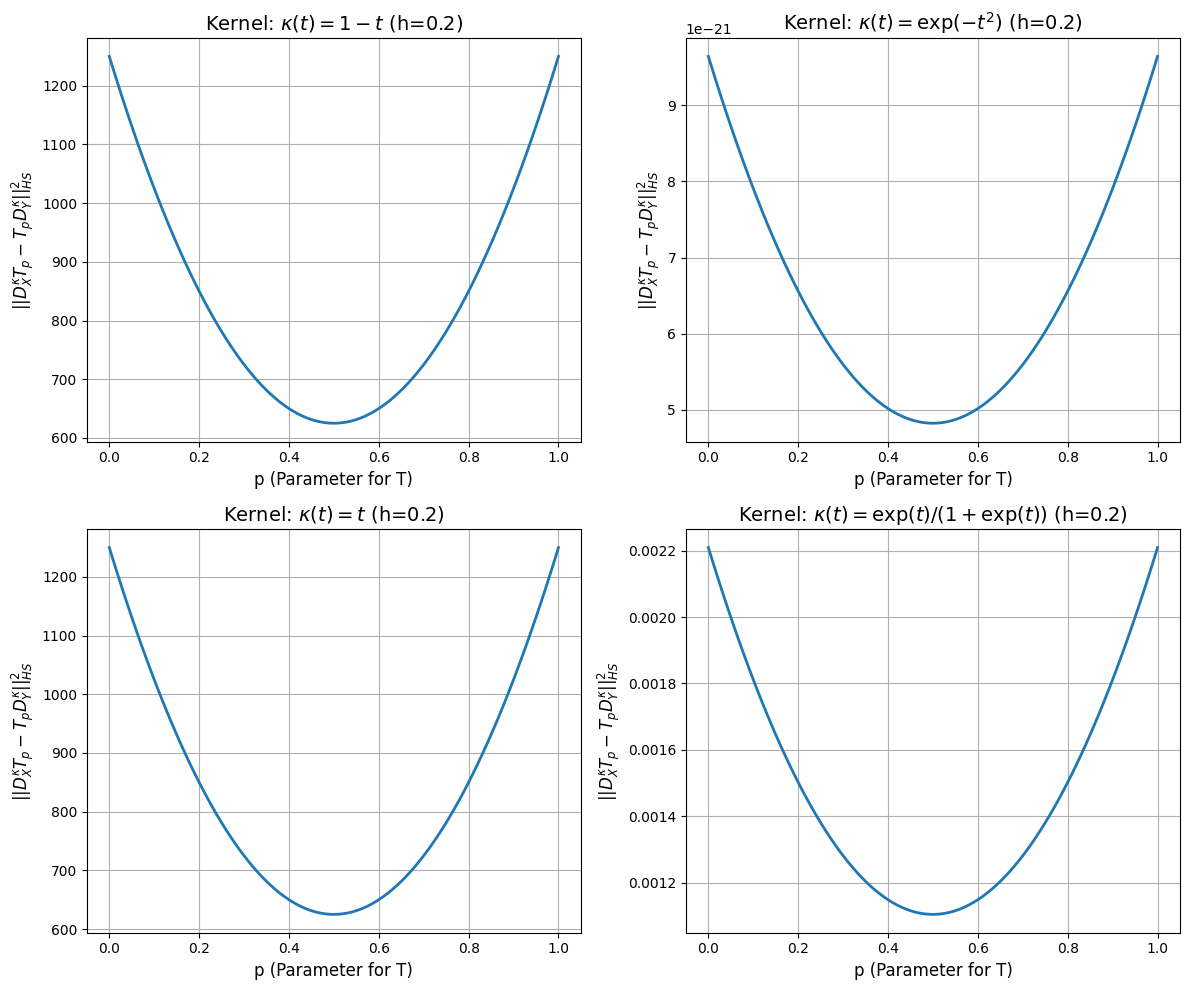

In [43]:
p_values, results = plot_convexity_check(h=0.2)